<a href="https://colab.research.google.com/github/raqueeb/Intermediate-scikit-learn/blob/master/feature_pipeline_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ফিচার ইঞ্জিনিয়ারিং এবং পাইপলাইন

আমাদের আগের বইটাতে লিনিয়ার রিগ্রেশন নিয়ে বেশি ফোকাস করেছিলাম। কারণ পৃথিবীর অনেক কিছুর সম্পর্ক লিনিয়ার। বাসার ঘরের সাথে ভাড়ার সম্পর্ক, পজিশনের সাথে স্যালারির সম্পর্ক। 

যদি ডেটা লিনিয়ার না হয়? তখন কিভাবে ডেটা ফিট করবো? সেটা নিয়ে আজকের গল্প। নতুন বইতে একটু নতুন গল্প। 

পলিনোমিয়াল রিগ্রেশন।

দেখুন এখানে, https://github.com/raqueeb/Intermediate-scikit-learn/blob/master/feature_pipeline.ipynb

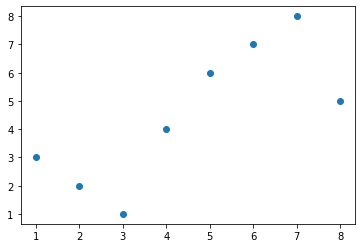

In [1]:
import numpy as np
from numpy import nan

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5, 6, 7, 8]) # বড় X নয় কিন্তু
y = np.array([3, 2, 1, 4, 6, 7, 8, 5])

plt.scatter(x, y);

একটা অ্যারেকে নতুন এক্সিস মানে ডাইমেনশনে ফেলি।

In [0]:
X = x[:, np.newaxis]

In [3]:
X

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8]])

## লিনিয়ার রিগ্রেশন দিয়ে ডেটাকে ফিট করছি

এটা ভালো হয়নি, প্রচুর এরর

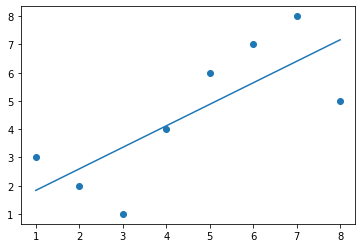

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X, y)
yfit = model.predict(X)

plt.scatter(x, y)
plt.plot(x, yfit);

In [5]:
model.coef_

array([0.76190476])

### সরল রেখার ফর্মুলা

১ ডিগ্রী পলিনোমিয়াল মানে সরল রেখা, ফলে দরকার দুটো প্যারামিটার

$y = mx + b$ এর মতো $y = a + bx$ অথবা $y = ax + b$

In [6]:
X.shape

(8, 1)

## পলিনোমিয়াল দিয়ে দেখি

তিন ডিগ্রী পলিনোমিয়াল একটা কিউবিক কার্ভ দিয়ে ডেটাকে মেলাতে হলে a, b, c এবং d ৪টা প্যারামিটার হতে পারে।

$y = a + bx + cx^2 + dx^3$

৩ ডিগ্রী দিয়ে নতুন ফিচার

In [7]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)

X2

array([[  1.,   1.,   1.],
       [  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.],
       [  5.,  25., 125.],
       [  6.,  36., 216.],
       [  7.,  49., 343.],
       [  8.,  64., 512.]])

In [8]:
X2.shape

(8, 3)

$y = a + bx + cx^2 + dx^3$

৩ ডিগ্রী দিয়ে নতুন ফিচার দেখি get_feature_names() দিয়ে।

In [9]:
poly.get_feature_names()

['x0', 'x0^2', 'x0^3']

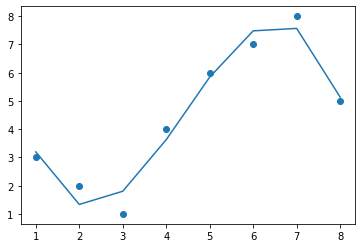

In [10]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)

plt.scatter(x, y)
plt.plot(x, yfit);

## নামপাই দিয়ে

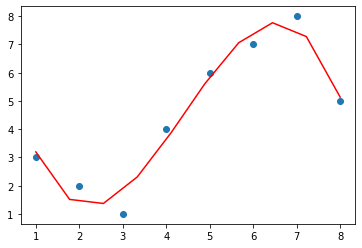

In [11]:
coefs = np.polyfit(x, y, 3)
obj = np.poly1d(coefs) #কোএফিসিয়েন্ট দেখতে চাইলে দেখতে পারেন
x_line = np.linspace(min(x), max(x), 10) # x এর নতুন ভ্যালু
y_line = obj(x_line)

plt.plot(x, y, 'o')  
plt.plot(x_line, y_line, 'r')

In [12]:
coefs

array([-0.16161616,  2.13419913, -7.13275613,  8.35714286])

## আরেকটা উদাহরণ, ডেটা জেনারেট করি ফর্মুলা দিয়ে

In [0]:
# রেকর্ডের সংখ্যা ১০০ 
N = 100

# আমরা কিছু ইন্ডিপেন্ডেন্ট ভ্যালু মানে X এর মান জেনারেট করি
X = 10 * np.random.rand(N, 1) - 5
y1 = 0.5 * X**2 + X + 5 + np.random.randn(N, 1)

আমরা এখানে y এর জন্য $X^2$ এর কোএফিসিয়েন্ট ০.৫ এবং $X$ এর কোএফিসিয়েন্ট ১। এর সাথে ইন্টারসেপ্ট ৫ + পাশাপাশি কিছু নয়েজ যোগ করা হয়েছে ডেটাকে রিয়ালিস্টিক দেখানোর জন্য।

আমরা একটা মডেল তৈরি করে এর ভেতরের তিনটা কোএফিসিয়েন্ট বের করতে পারি কি না?

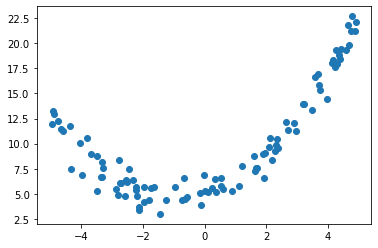

In [14]:
plt.scatter(X, y1)
plt.show()   

In [0]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(X)

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_poly, y1)
lr.intercept_, lr.coef_

(array([5.03521111]), array([[0.97898809, 0.50272104]]))

In [0]:
X_new = np.array([[0], [2], [5]])
X_poly_new = poly_features.fit_transform(X_new)
y_predict = lr.predict(X_poly_new)

In [18]:
y_predict

array([[ 5.03521111],
       [ 9.00407143],
       [22.49817748]])

In [19]:
y_original = 0.5 * 0 + 0 + 5  # আমরা প্রেডিক্ট করেছিলাম 5.00....
y_original

5.0

In [20]:
y_original = 0.5 * (2**2) + 2 + 5 #আমরা প্রেডিক্ট করেছিলাম 8.97....
y_original

9.0

In [21]:
y_original = 0.5 * (5**2) + 5 + 5 #আমরা প্রেডিক্ট করেছিলাম 22.24...
y_original   

22.5

## আমরা একটা পাইপলাইনের উদাহরণ দেখি

In [0]:
X = np.array([[  1.,   1.,   1.],
              [  2.,   4.,   8.],
              [  3.,   9.,  27.],
              [  4.,  nan,  64.],
              [  5.,  25., 125.],
              [  6.,  36., 216.],
              [  7.,  49., nan, ],
              [  8.,  64., 512.]])

In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

X2 = imputer.fit_transform(X)
X2

array([[  1.        ,   1.        ,   1.        ],
       [  2.        ,   4.        ,   8.        ],
       [  3.        ,   9.        ,  27.        ],
       [  4.        ,  26.85714286,  64.        ],
       [  5.        ,  25.        , 125.        ],
       [  6.        ,  36.        , 216.        ],
       [  7.        ,  49.        , 136.14285714],
       [  8.        ,  64.        , 512.        ]])

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X2)

X_scaled

array([[0.        , 0.        , 0.        ],
       [0.14285714, 0.04761905, 0.01369863],
       [0.28571429, 0.12698413, 0.05088063],
       [0.42857143, 0.41043084, 0.12328767],
       [0.57142857, 0.38095238, 0.24266145],
       [0.71428571, 0.55555556, 0.42074364],
       [0.85714286, 0.76190476, 0.26446743],
       [1.        , 1.        , 1.        ]])

In [25]:
from sklearn.linear_model import Ridge

linridge = Ridge(alpha=20.0).fit(X_scaled, y)

linridge

Ridge(alpha=20.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [26]:
X_scaled

array([[0.        , 0.        , 0.        ],
       [0.14285714, 0.04761905, 0.01369863],
       [0.28571429, 0.12698413, 0.05088063],
       [0.42857143, 0.41043084, 0.12328767],
       [0.57142857, 0.38095238, 0.24266145],
       [0.71428571, 0.55555556, 0.42074364],
       [0.85714286, 0.76190476, 0.26446743],
       [1.        , 1.        , 1.        ]])

In [27]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X2, y)
model.predict(X2)

array([1.37756364, 2.40616197, 3.39670132, 4.7353445 , 5.02305926,
       5.53860593, 7.84880847, 5.67375491])

In [0]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('imputer', SimpleImputer(strategy='mean')),
                ('minmax', MinMaxScaler()),
                ('poly',  PolynomialFeatures(degree=2, include_bias=False)),
                ('lr', LinearRegression())])

In [29]:
pipe.fit(X, y)  # X with missing values, from above


Pipeline(memory=None,
         steps=[('imputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('minmax', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('poly',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('lr',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [30]:
print(y)
print(pipe.predict(X))

[3 2 1 4 6 7 8 5]
[3. 2. 1. 4. 6. 7. 8. 5.]


In [31]:
score = pipe.score(X, y)
print('Linear Regression pipeline test accuracy: %.2f' % score)

Linear Regression pipeline test accuracy: 1.00
